In [1]:
import os
import json

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely import wkt
from colormap import rgb2hex
from matplotlib.patches import Polygon

In [2]:
df = pd.read_csv(os.path.join('..', 'data', 'fences-quays', 'metadata.csv'))
gdf = gpd.read_file(os.path.join('..', 'data', 'neighborhoods.geojson'))

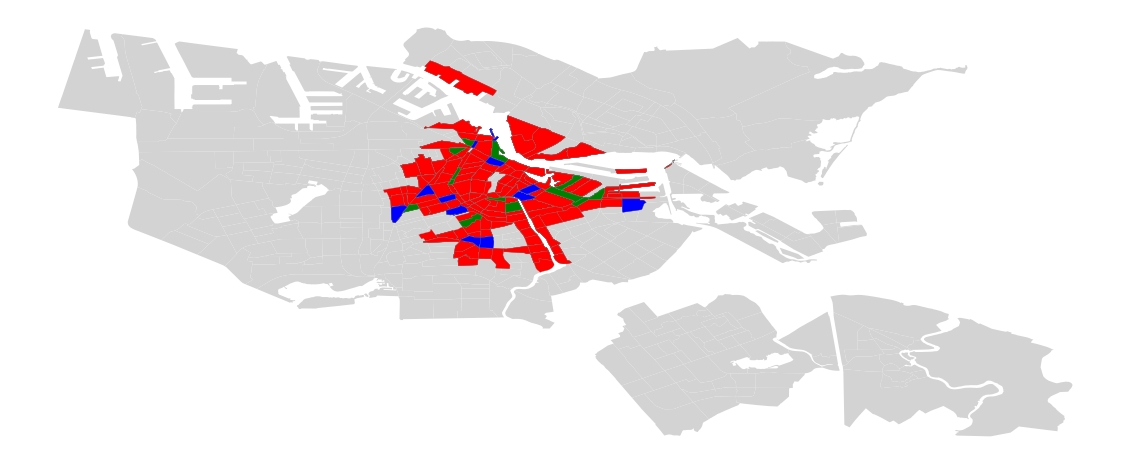

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

subsets = ['train', 'test', 'valid']
ax = gdf.plot(color='lightgray')

for subset, color in zip(subsets, ['r', 'g', 'b']):
    label = subset
    subset = gpd.GeoDataFrame(df[df.subset == subset].geometry_y.apply(wkt.loads))
    subset = subset.rename(columns={'geometry_y':'geometry'})
#     subset['coords'] = subset['geometry'].apply(lambda x: x.representative_point().coords[:])
#     subset['coords'] = subset[coords[0] for coords in c['coords']]
    subset.plot(ax=ax, color=color, edgecolor='0.5', linewidth=.25)
    
#     for idx, row in c.iterrows():
#         plt.annotate(s=row['NAME'], xy=row['coords'],
#                  horizontalalignment='center')

plt.axis('off')
plt.show()

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\geopandas\plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Buurtcode
A00a    1
A00b    1
A00c    1
A00d    1
A00e    1
       ..
N61a    1
N71e    1
N71g    1
N71h    1
N72a    1
Name: Buurtnaam, Length: 121, dtype: int64
Buurtcode
A03d    1
A03f    1
A05a    1
A06e    1
A06f    1
A09b    1
A09f    1
A09h    1
A09i    1
E13c    1
E14c    1
E19c    1
K47h    1
Name: Buurtnaam, dtype: int64
Buurtcode
A04f    1
A04i    1
A05b    1
A05f    1
E12b    1
E18a    1
E19a    1
E22a    1
E43a    1
K25d    1
K47g    1
M32a    1
Name: Buurtnaam, dtype: int64


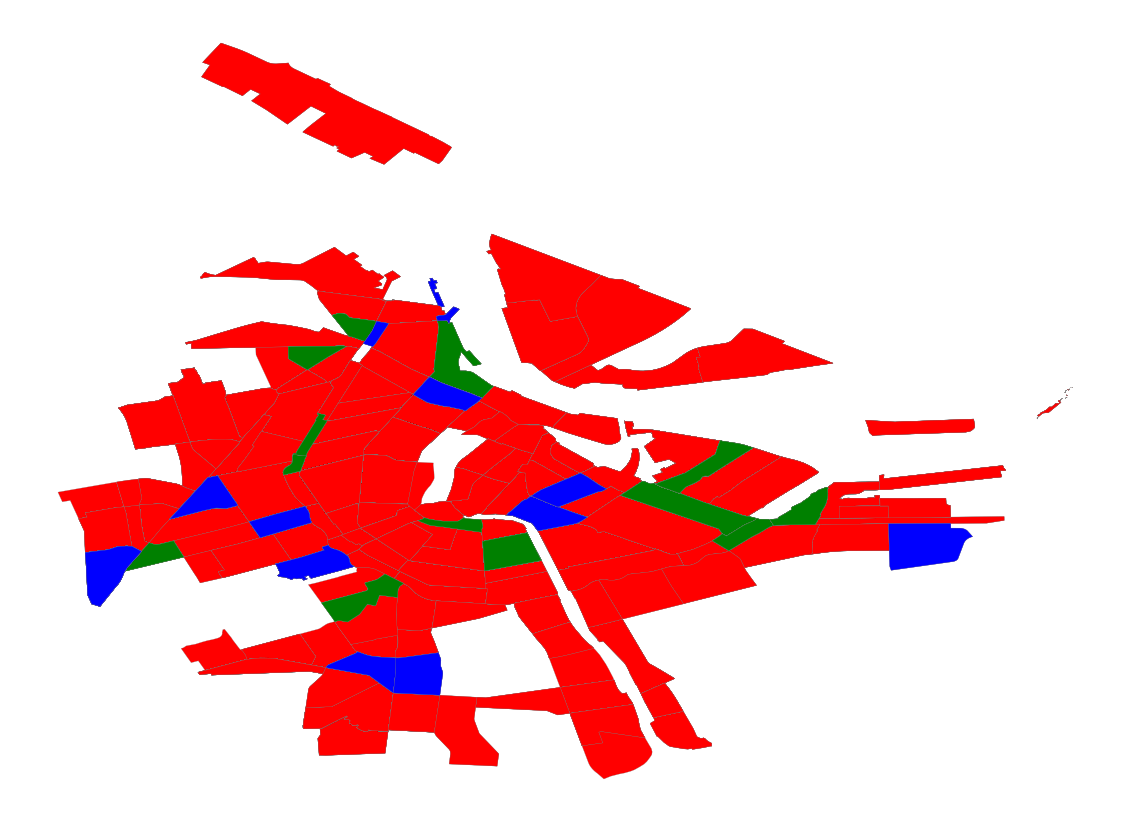

In [4]:
plt.rcParams["figure.figsize"] = (20,20)

subsets = ['train', 'test', 'valid']

ax = gpd.GeoDataFrame().plot()

def f(x):
    try:
        return x.representative_point().coords[:]
    except:
        return 0

for subset, color in zip(subsets, ['r', 'g', 'b']):
    label = subset
    subset = df[df.subset == subset]
    print(subset.groupby('Buurtcode').Buurtnaam.nunique())
    
    subset = gpd.GeoDataFrame(subset.geometry_y.apply(wkt.loads))
    subset = subset.rename(columns={'geometry_y':'geometry'})
    
#     print(subset['geometry'])
#     subset['coords'] = subset['geometry'].apply(f)
#     subset['coords'] = subset[[coords[0] for coords in c['coords']]]
    subset.plot(ax=ax, color=color, edgecolor='0.5', linewidth=.25)
    
#     print(subset['coords'])
    
#     for idx, row in c.iterrows():
#         plt.annotate(s=row['NAME'], xy=subset['coords'],
#                  horizontalalignment='center')

plt.axis('off')
plt.show()

In [5]:
df.subset.value_counts()

train    1682
test      163
valid     155
Name: subset, dtype: int64

In [6]:
fences, quays = 0, 0

for subset in ['train', 'test', 'valid']:
    fpath = os.path.join('..', 'data', 'fences-quays', 'annotations', f'{subset}-annotations-6px.json')
    
    with open(fpath, 'r') as f:
        data = json.load(f)

    for image in data['images']:
        fence, quay = False, False
        for annotation in data['annotations']:
            if annotation['image_id'] == image['id']:
                if annotation.get('counts'):
                    fence = True
                if annotation.get('segmentation'):
                    quay = True
        fences += fence
        quays += quay

    print(fences, quays)
        
    

1173 1299
1302 1437
1414 1567
